In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import pandas as pd


In [6]:
all_covariates = pd.read_csv(f'../../data/data_fa21/all_students_features_T_e=7_T_a=7_finalized.csv', index_col = 0)


c:\Program Files\Python37\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
all_covariates = pd.read_csv(f'../../data/data_fa21/1213_all_students_features_include_nonsurveilled_T_e=7_T_a=7.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/data_fa21/1213_all_students_features_include_nonsurveilled_T_e=7_T_a=7.csv'

In [9]:
vaccination = pd.read_csv("../../../booster_effectiveness/data/data_student_vax_raw_full_population.csv")


In [10]:
vaccination["academic_career"].value_counts()

UG    15114
GR     6372
LA      765
GM      641
VM      497
Name: academic_career, dtype: int64

In [11]:
all_covariates.merge(vaccination, how="left", on="employee_id_hash")["vac_type"].value_counts()

Pfizer            838797
Not vaccinated    443849
Moderna           354704
J&J                67817
Sinopharm          29224
Sinovac            26651
AstraZeneca         9663
Others               936
Name: vac_type, dtype: int64

In [12]:
vaccination["first_dose_calendar_date"] = vaccination["first_dose_calendar_date"].astype("datetime64")

In [13]:
vax_stats_2021 = vaccination[vaccination["first_dose_calendar_date"].dt.year == 2021].groupby(vaccination["first_dose_calendar_date"].dt.month)["first_dose_calendar_date"].count()

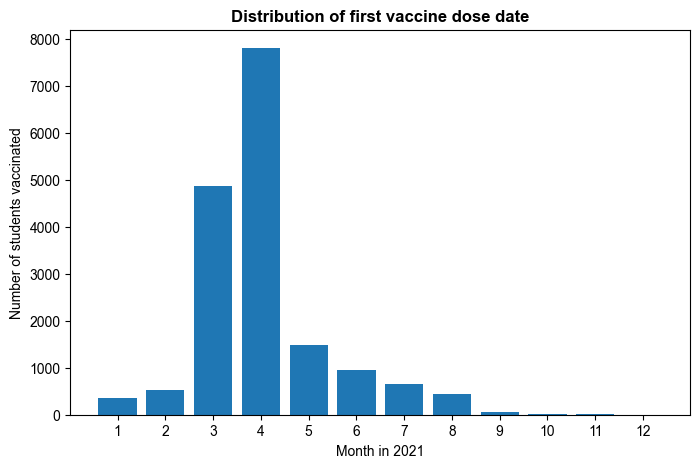

In [15]:
plt.rcParams["font.family"] = 'Arial'

fig, ax = plt.subplots(figsize = (8, 5))

ax.bar(vax_stats_2021.index, vax_stats_2021)

ax.set_ylabel("Number of students vaccinated", fontsize=10)
ax.set_title("Distribution of first vaccine dose date", fontsize=12, weight='bold')
ax.set_xlabel("Month in 2021", fontsize=10)
ax.set_xticks(vax_stats_2021.index)

# fig.savefig("../plots/vaccinations_2021.pdf")